<a href="https://colab.research.google.com/github/eunseochu/YB_13th/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **사이킷런 LinearREgression을 이용한 보스턴 주택 가격 예측** <br/>
사이킷런의 linear_models 모듈은 매우 다양한 종류의 선형 기반 회귀를 클래스로 구현해 제공
- 규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스인 LinearRegression을 이용

**1) LinearRegression 클래스 - Ordinary Least Squares** <br/>
LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해, <br/>
OLS(Ordinary Least Square) 추정 방식으로 구현한 클래스
- fit() 메서드로 X, y 배열을 입력 받으면 회귀 계수 (Coefficient)인 W를 coef_ 속성에 저장

```
class sklearn.linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)
```



**1-1) 입력 파라미터** <br/>
- **fit_intercpet**: 불린 값으로, 디폴트는 True. <br/> **intercpet(절편) 값을 계산할 것인지** 말지를 지정. 만일 False로 지정하면 Intercpet가 0으로 지정
- **normalize**: 불린 값으로, 디폴트를 False. fit_intercpet가 False인 경우에는 이 파라미터가 무시됨. <br/>
만일 True이면 회귀를 수행하기 전에 **입력 데이터 세트를 정규화**


**1-2) 속성** <br/>
- **coef_**: fit() 메서드를 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수)
- **intercpet_**: intercept 값

**1-3) 다중 공선성(multi-collinearity) 문제** <br/>
Ordinary Least Squares 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받음 <br/>
피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감
- 일반적으로 상관관계가 높은 피처가 많은 경우 **독립적인 중요한 피처만 남기고 제거하거나 규제 적용**
- 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 **PCA를 통해 차원 축소**를 고려

**2) 회귀 평가 지표** <br/>
회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심
- 실제값과 예측값의 차이를 그냥 더하면 +와 -가 섞여서 오류가 상쇄되므로 정확한 지표가 될 수 없음
- 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값을 구함

**2-1) 회귀의 성능 평가 지표 종류** <br/>
- **MAE**: Mean Absolute Error이며 실제 값과 예측값 차이를 **절댓값으로 변환해 평균**한 것
- **MSE**: Mean Squared Error이며 실제 값과 예측값 차이를 **제곱해 평균**한 것
- **RMSE**: MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것
- **R^2**: 분산 기반으로 예측 성능을 평가. **실제 값의 분산 대비 예측값의 분산 비율**을 지표로 하며, <br/> 1에 가까울수록 예측 정확도가 높음

이 밖에 MSE나 RMSE에 로그를 적용한 MSLE(Mean Square Log Error)와 RMSE도 사용

**2-2) 사이킷런 평가 지표 API 및 scoring 파라미터 적용 값** <br/>
사이킷런은 아쉽게도 RMSE를 제공하지 않으며, RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서 직접 계산
- **MAE** (Mean Absolute Error)
 - 사이킷런 평가 지표 API: metrics.mean_absolute_error
 - scoring 함수 적용 값: 'neg_mean_absolute_error'
- **MSE** (Mean Squared Error)
 - 사이킷런 평가 지표 API: metrics.mean_squared_error
 - scoring 함수 적용 값: 'neg_mean_sqaured_error'
- **R^2** 
 - 사이킷런 평가 지표 API: metrics.r2_score
 - scoring 함수 적용 값: 'r2'

**2-3) 유의점** <br/>
실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우, 사이킷런 Scoring 함수에 반영하려면 보정이 필요 <br/>
- MAE의 scoring 파라미터 값의 'neg_'는 Negative(음수) 값을 가진다는 의미인데, <br/>
MAE는 절댓값의 합이기 때문에 음수가 될 수 없음
- scoring 함수가 음수값을 반환하는 이유는 **score값이 클수록 좋은 평가 결과로 자동평가**하기 때문
- 회귀 평가 지표는 값이 커지면 오히려 나쁜 모델이라는 의미이므로, <br/> **-1을 원래 평가 지표 값에 곱해 음수로 만들어** 더 작은 오류 값이 더 큰 숫자로 인식되도록 함
- 사이킷런 평가 지표 API는 정상적으로 양수의 값을 반환 <br/>
(-1 * metrics.mean_absolute_error() = neg_mean_absolute_error)

**3) LinearRegression을 이용해 보스턴 주택 가격 회귀 구현** <br/>
사이킷런에 내장된 데이터 세트인 보스턴 주택 가격 데이터를 load_boston()을 통해 이용 <br/>
- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- MEDV: 본인 소유의 주택 가격(중앙값)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#Boston 데이터 세트 로드
boston = load_boston()

#boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임. 이를 price 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**3-1) 데이터 세트 피처 살펴보기** <br/>
데이터 세트 피처의 Null 값은 없으며 모두 float형

In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**3-2) 각 칼럼의 회귀 결과에 미치는 영향 시각화** <br/>
'RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD'에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인
- 시본(Seaborn)의 regplot() API: X, Y 축 값의 산점도와 함께 선형 회귀 직선 그려줌
- matplotlib.subplots()를 이용해 각 ax마다 칼럼과 PRICE의 관계 표현
 - 여러 개의 그래프를 한번에 표현하기 위해 자주 사용
 - ncols: 열 방향으로 위치할 그래프 개수
 - nrows: 행 방향으로 위치할 그래프의 개수

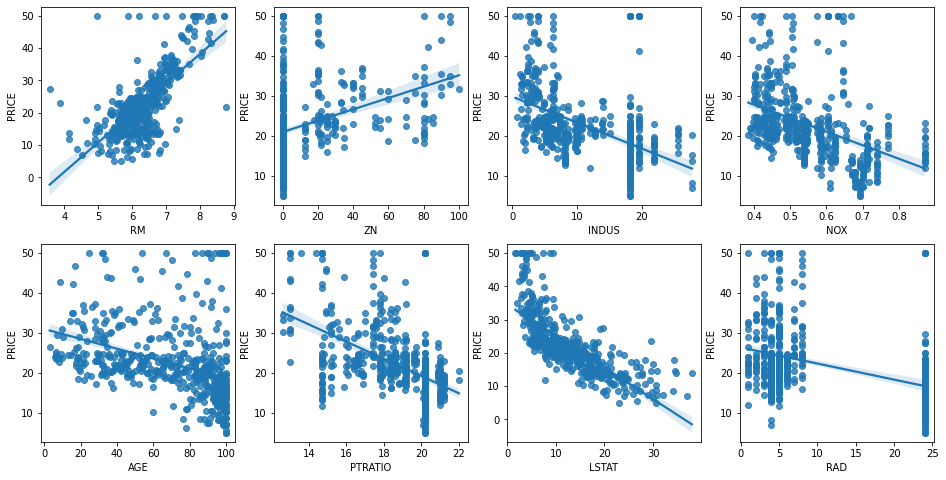

In [5]:
# 2개의 행과 4개의 열을 가진 subplot를 이용 axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 사본의 regplot를 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x = feature,y = 'PRICE',data = bostonDF,ax = axs[row][col])

다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남
 - RM(방 개수)은 양 방향의 선형성(Postive Linearity)이 가장 큼 <br/>
 - LSTAT(하위 계층의 비율)는 음 방향의 선형성(Negative Linearity)이 가장 큼

**3-3) 보스턴 주택 가격의 회귀 모델 생성** <br/>
train_test_split()을 이용해 학습과 테스트 데이터 세트 분리해 학습과 예측 수행 <br/>
metrics 모듈의 mean_squared_error()와 r2_score() API를 이용해 MSE와 R2 Score 측정

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE:17.297, RMSE:4.159
Variance score:0.757


**3-4) intercepty(절편)과 coefficients(회귀 계수) 확인** <br/>
LinearRegression 객체의 intercept_, coef_ 확인

In [7]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.99559517216477
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


**3-4-1) 회귀 계수를 높은 값 순으로 출력** <br/>
피처별 회귀 계수 값으로 다시 매핑하고, 판다스 Series의 sort_values() 함수를 이용해 출력
- RM이 양의 값으로 회귀 계수가 가장 크며, NOX 피처의 회귀 계수 -값이 매우 큼

In [8]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series 로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data = np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

**3-5) MSE와 RMSE 측정** <br/>
5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 측정
- RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환
 - 넘파이의 sqrt() 함수를 적용
- 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해 scoring = 'neg_mean_squared_error'로 <br/> 사이킷런의 scoring 함수를 호출하면 모델에서 계산된 MSE 값이 -1을 곱해서 반환
 - 사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인 데 반해, <br/>
 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델이기 때문
- **cross_val_score()에서 반환된 값에 다시 -1을 곱해야** 양의 값인 원래 모델에서 계산된 MSE

In [9]:
from sklearn.model_selection import cross_val_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1,inplace = False)
lr = LinearRegression()

# cross_val_score() 로 5폴드 세트로 MSE 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring = 'neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829
